# Research Question
What are the best metrics to use to rank the value of a value stock for a dividend stock portfolio calculation and how can it be best enumerated to yield the most accurate results?

## Analysis Plan
I am interested in exploring how we can create appropriate abstracts/data summaries of the datasets used using the most suitable models and formulas for the clients' background information. This background information is aimed to help clients make decisions and be mindful of how each variable influences their portfolio creation process, having autonomy over the direction in which the portfolio calculations and analyses will head. To do this, there will be computation of relevant variables which are best fit to be analysed together, having backend-research to back up the relevance of each paired/grouped variable that is explored.

## Output of Analysis
The aim of this project is to return the best dividend stocks to invest in for both the long term and short term. Within the "best stock" measurement, the risk (safety of the industry, diversification, etc.) and payout is calculated on the company-level and industry-level.

This will be done in two stages: scoring the dividend stock as an individual stock then in comparison to stocks in its industry. 

The first stage involves defining and scoring individual dividend stocks at the company-level, analysing all stocks individually on how good a stock is to invest in on its own. In this section, an "Individual Score" out of 100 will be outputted to display its rating after mentioned calculations which includes the stock score alongside its risk score. 

The second stage will calculate the safety of an industry to be invested in and score them out of 100 as well. Then, within each industry it will sort the best stocks to invest in. This information will be useful when calculating the risk variable for portfolio (production). 

## Analysis 

### Stage 1: Defining a good dividend stock
1. Consistent Dividend Payments: a good track record of dividend payments over time indicates that the company has a stable financial position from generating sufficient cash flow - an important variable to support dividend payments.
2. Strong Financials: A strong balance sheet, healthy cash flow, and sustainable earnings growth ensures that the company can continue to pay dividends through tough economic times.
3. Low payout Ratio (percentage of earnings paid out as dividends): a high payout ratio means the company is not reinvesting enough capital to support future growth.
4. Competitive Dividend Yield: This is compared to other companies in the same industry of the broader market. (Note: a high yield is attractive but may not be sustainable of the company itself fundamentally, hence it is only taken as a weak variable.)
5. Commitment to Dividend Policy: Having a good management team that is commited to maintaining or increasing dividend payments over time demonstrates confidence in the company's future prospects and willingness to share profits with shareholders. (we cannot measure this) 

### Stage 1.2: Calculating the risk score (based on the company’s industry position) 

#### Key risk factors: 
1. Payout Ratio: a higher percentage of its earnings as dividends → higher risk
1. Debt levels: companies with higher debt may struggle to continue paying dividends and are in more of a risk to declare bankruptcy 
1. Industry volatility: cyclical industries are at risk of volatile earnings and cash flows
1. Economic uncertainty: in uncertain economic environments, companies may perserve cash over paying dividends and hence would result in a cut of dividends (we will not measure this)

#### Quantifying the variables into a score of 0-100 using a weighted average.
##### Assigning weights to each variable: 
1. Payout ratio: 35% – a high payout ratio means company is paying a lot of its earnings in dividends, which is cited in many investing cites as a “red flag” as they reinvest less money into the company or to deal with unexpected events. This is risky for long term (critical for dividend sustainability) 
1. Debt levels: 25% – if a company continues to face financial difficulty or if interest rates rise, they may not be able to sustain dividend payments. This is a second critical element as debt significantly impacts a company’s financial health. 
1. Industry Volatility: 15% – if an industry is volatile or cyclical, it may show unstable earnings and cash flows and hence are not able to pay dividends consistently. (not good for long term) (back up with info from econ textbook)
1. Dividend history: 25% – this provides insights into its commitment to maintaining or increasing dividends over time. This can account for the company’s commitment to dividend policy to an extent. 


### Stage 2.2: Calculating the risk score (based on the industry, safety score) Industry Safety Score
1. Industry stability: 30% – Stable industries have steady demand for their products or services, hence they are less susceptible to economic downturns or competition from new entrants. Long history of stable growth and profitability shows a stable industry, 
1. Financial health of companies within each industry: 30%
1. Healthy balance sheet generating consistent cash flows
1. Low debt-to-equity ratio: amount of debt a company has compared to its equity ; high DTE can indicate a company is heavily leveraged and may have difficulty meeting its financial obligations in the future. (bad for long term) 
1. Strong earning growth: companies that are growing their earning over time, as it provides a foundation for future dividend increases. 
1. History of consistent dividend payments – consistent track record: confidence in the company’s ability to continue paying dividends in the future. 
1. Evaluate credit ratings
1. Things we are not measuring here:
1. Regulatory environment (can impact the safety of an industry – regulatory risks of an industry like changes in tax laws, tariffs, or environmental regulations) can impact them a lot. But we will not be measuring it here. 
1. Economic conditions: economic outlook such as inflation or interest rates may cause potential risks. 


### Stage 3: Worthiness




assumptions: 
we are dropping all columns with NA values and assuming they will not be good for our calculations

things i might do next:
1. redo the tables and only remove the na values when they are present in my columns

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from IPython.display import display
sys.path.append('..')
from analysis.code import project_functions1 as pf1
from analysis.code import project_functions2 as pf2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
quant = pf1.QuantitativeAnalysis()
viz = pf1.DataVisualization()

In [37]:
#complete df
processed_equities = pf1.EquityData('processed_us_equities_tradingview_data_')
complete_df = processed_equities.load_and_process('complete_data', '../data/processed/')

#suggested companies dataframe
top_suggested_companies = pd.DataFrame()
companies = ['MSFT', 'CVX', 'VZ', 'AMGN', 'AXP', 'IBM', 'LOW', 'TGT', 'D', 'FIS', 'WBA', 'TSN', 'BIP', 'HD', 'TXN', 'ADP', 'APD']

for company in companies:
    row = complete_df.loc[complete_df['Ticker'] == company]
    top_suggested_companies = top_suggested_companies.append(row)
    
    
top_suggested_companies

,Ticker,Description,Price,Market Capitalization,Price to Earnings Ratio (TTM),Basic EPS (TTM),Number of Employees,Sector,Free Cash Flow (Annual YoY Growth),Free Cash Flow Margin (FY),...,Net Margin (TTM),6-Month Performance,YTD Performance,Yearly Performance,1-Year Beta,Volatility,Price to Revenue Ratio (TTM),Enterprise Value/EBITDA (TTM),Enterprise Value (MRQ),Total Shares Outstanding
S&P500 Position,,,,,,,,,,,,,,,,,,,,,
1,MSFT,Microsoft Corporation,242.71,1.806686e+12,27.591728,9.0309,221000.0,Technology Services,16.092876,32.858728,...,33.048007,-12.303078,-0.152213,-19.158645,1.152982,2.460776,9.086498,18.821003,1.770650e+12,7.443800e+09
15,CVX,Chevron Corporation,174.20,3.368398e+11,9.829860,18.3381,NaN,Energy Minerals,73.699569,15.908908,...,14.988863,9.346557,-2.156819,34.000000,0.622729,3.328151,1.455971,6.164020,3.509710e+11,1.933640e+09
39,VZ,Verizon Communications Inc.,41.05,1.724025e+11,8.043065,5.0584,117100.0,Communications,-27.003584,10.270764,...,15.534037,-9.700836,3.218506,-20.198289,0.376466,1.523342,1.249479,7.268334,3.408010e+11,4.199820e+09
58,AMGN,Amgen Inc.,251.59,1.342432e+11,20.331687,12.5397,24200.0,Health Technology,-15.249267,32.250741,...,26.122683,2.297308,-3.557327,12.291899,0.504875,1.420591,5.215505,12.640413,1.484910e+11,5.335790e+08
60,AXP,American Express Company,172.66,1.290172e+11,17.446464,NaN,NaN,Finance,NaN,NaN,...,13.724229,12.065944,15.460746,0.523987,1.259311,3.217190,2.361972,NaN,NaN,7.472330e+08
65,IBM,International Business Machines Corporation,135.30,1.223283e+11,76.379653,1.8170,NaN,Technology Services,-20.113658,14.166529,...,2.944043,2.639964,-4.110560,1.584203,0.649322,1.589790,2.033534,12.358597,1.742900e+11,9.041260e+08
66,LOW,"Lowe's Companies, Inc.",201.91,1.220955e+11,19.844957,10.2303,340000.0,Retail Trade,-10.779866,8.581818,...,6.942983,6.475769,0.208447,-11.439098,0.979559,1.695252,1.308388,12.223780,1.577690e+11,6.047030e+08
101,TGT,Target Corporation,168.68,7.764510e+10,23.071552,7.3609,450000.0,Retail Trade,-35.487557,4.793170,...,3.171420,2.615890,12.472079,-21.284241,1.385290,2.322915,0.716843,12.732031,9.584700e+10,4.603100e+08
152,D,"Dominion Energy, Inc.",62.69,5.223802e+10,22.491536,2.8010,17100.0,Utilities,-83.333333,-14.494414,...,11.005443,-23.586056,2.234181,-19.710553,0.492613,1.567272,3.112228,13.752122,1.030190e+11,8.332750e+08


In [38]:
viz.heatmap_plot(top_suggested_companies,'17 Top Recommended Companies HeatMap')

In [39]:
complete_df = complete_df.loc[~complete_df['Ticker'].isin(companies)]
viz.heatmap_plot(complete_df, title= 'All Other Companies HeatMap')

In [40]:
##### PREPARING KEY VARIABLES #####


# uploading complete data frame without NA values
complete = pd.read_csv("/Users/keishavalenna/Desktop/Files/project-group-group15/data/processed/processed_us_equities_tradingview_data_complete_data.csv")

# Data frame with required columns
df = complete[['Ticker', 'Description','Sector','Price','Price to Earnings Ratio (TTM)','Basic EPS (FY)','Gross Profit (FY)','Debt to Equity Ratio (MRQ)','Net Income (FY)','Dividend Yield Forward','Dividends Paid (FY)','Dividends per Share (FY)','Volatility','Total Shares Outstanding','Total Revenue (FY)','Net Debt (MRQ)','Quick Ratio (MRQ)','Current Ratio (MRQ)','Dividends Paid (FY)']]

### CALCULATING VARIABLES ###

## Variable 1: Payout Ratio
payout_ratio = df[['Ticker','Description','Sector','Dividends per Share (FY)','Basic EPS (FY)']]
payout_ratio['Payout Ratio'] = (payout_ratio['Dividends per Share (FY)'])/(payout_ratio['Basic EPS (FY)'])

# companies with a negative payout ratio are companies who are projected to lose money, and 
# companies with a payout ratio of 0 are companies who do not pay dividends. Hence, companies with
# these variables will be removed.

payout_ratio = payout_ratio[payout_ratio['Payout Ratio'] > 0]


## Variable 2: Financial Health
# cash flow
cash_flow = df[['Ticker', 'Description','Sector','Price','Gross Profit (FY)','Total Revenue (FY)']]
cash_flow['Cash Flow'] = (cash_flow['Gross Profit (FY)']/cash_flow['Total Revenue (FY)'])*100

# profitability
profitability = df[['Ticker', 'Description','Sector','Basic EPS (FY)']]

# debt levels
debt_levels = df[['Ticker', 'Description','Sector','Price','Debt to Equity Ratio (MRQ)','Current Ratio (MRQ)','Gross Profit (FY)']]
debt_levels['Debt Levels'] = debt_levels.apply(lambda row: (row['Debt to Equity Ratio (MRQ)'] + row['Current Ratio (MRQ)'] + row['Current Ratio (MRQ)']) / 3, axis=1)

financial_health = df[['Ticker', 'Description','Sector','Price']]
financial_health['Cash Flow'] = cash_flow['Cash Flow']
financial_health['Profitability'] = profitability['Basic EPS (FY)']
financial_health['Debt Levels'] = debt_levels['Debt Levels']
financial_health['Financial Health'] = (financial_health['Cash Flow']+financial_health['Profitability']+financial_health['Debt Levels'])/3

## Variable 3: Industry volatility
per_industry = df.groupby('Sector')['Gross Profit (FY)'].sum().reset_index()
per_industry_df = per_industry.apply(lambda x: x.reset_index(drop=True))

# number of companies
companies = df.groupby('Sector').size().reset_index()
companies_df = companies.apply(lambda x: x.reset_index(drop=True))
column = companies_df.iloc[:,1]
per_industry_df['No. of Companies'] = column

# average return
per_industry_df['Average return'] = per_industry_df['Gross Profit (FY)']/per_industry_df['No. of Companies']

# variance of returns
new = pd.merge(df,per_industry_df,on='Sector', how='left')
variance = new[['Ticker', 'Description','Sector','Price','Gross Profit (FY)_x','Average return','No. of Companies']]
variance['Variance'] = ((variance['Average return']/variance['Gross Profit (FY)_x'])**2)/(variance['No. of Companies']-1)
variance['Standard Deviation'] = variance['Variance'].apply(lambda x: np.sqrt(x))


## Variable 4: Dividend history
div_history = df[['Ticker', 'Description','Sector','Price','Dividends per Share (FY)']]
div_history['Dividend Yield'] = (div_history['Dividends per Share (FY)']/div_history['Price'])*100


### DATAFRAME WITH ALL KEY VARIABLES ###
df['Payout Ratio'] = payout_ratio['Payout Ratio']
df['Debt Levels'] = debt_levels['Debt Levels']
df['Cash Flow'] = cash_flow['Cash Flow']
df['Volatility'] = variance['Standard Deviation']
df['Dividend Yield'] = div_history['Dividend Yield']
df['Financial Health'] = financial_health['Financial Health']
df = df[['Ticker','Description','Sector','Price','Payout Ratio', 'Debt Levels', 'Cash Flow', 'Volatility','Dividend Yield','Price to Earnings Ratio (TTM)','Debt to Equity Ratio (MRQ)','Financial Health','Basic EPS (FY)','Quick Ratio (MRQ)','Current Ratio (MRQ)','Dividends Paid (FY)']]


In [41]:
df = df.dropna(axis=0).reset_index()
df

# we drop na only after we've gotten the key factors, so that we do not lose 
# data if we were to delete all rows containing NA when it comes from a column
# that we aren't actually using. 

,index,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),Debt to Equity Ratio (MRQ),Financial Health,Basic EPS (FY),Quick Ratio (MRQ),Current Ratio (MRQ),Dividends Paid (FY),Dividends Paid (FY)
0,0,AAPL,Apple Inc.,Electronic Technology,143.00,0.146232,1.457725,43.309631,0.007889,0.629371,23.914718,2.614462,16.973985,6.1546,0.847235,0.879356,-1.484100e+10,-1.484100e+10
1,1,MSFT,Microsoft Corporation,Technology Services,242.71,0.255575,1.429485,68.401674,0.008908,1.021796,27.591728,0.425831,26.511587,9.7036,1.894846,1.931313,-1.813500e+10,-1.813500e+10
2,6,V,Visa Inc.,Commercial Services,229.10,0.213718,1.144626,77.502559,0.060078,0.654736,33.027942,0.554842,28.555262,7.0186,1.439518,1.439518,-3.203000e+09,-3.203000e+09
3,7,NVDA,NVIDIA Corporation,Electronic Technology,191.62,0.040952,2.441925,64.929033,0.077097,0.083499,86.637454,0.550283,23.759319,3.9070,2.738001,3.387746,-3.990000e+08,-3.990000e+08
4,8,XOM,Exxon Mobil Corporation,Energy Minerals,113.56,0.647555,0.972249,24.099676,0.038998,3.073265,9.419097,0.235326,10.153808,5.3895,1.015340,1.340711,-1.492400e+10,-1.492400e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,485,NTAP,"NetApp, Inc.",Electronic Technology,65.51,0.475986,1.639069,66.624506,0.319712,3.052969,9.929099,2.242097,24.155125,4.2018,1.265685,1.337555,-4.460000e+08,-4.460000e+08
235,489,IPG,"Interpublic Group of Companies, Inc. (The)",Commercial Services,35.95,0.445471,1.139484,15.322195,0.869760,3.004172,14.244209,1.328919,6.295359,2.4244,1.044766,1.044766,-4.277000e+08,-4.277000e+08
236,493,STX,Seagate Technology Holdings PLC,Electronic Technology,66.76,0.369560,-3.522125,29.748735,0.388373,4.149191,24.565589,-12.827660,11.240670,7.4954,0.692477,1.130642,-6.100000e+08,-6.100000e+08
237,497,NDSN,Nordson Corporation,Producer Manufacturing,235.97,0.244845,1.030441,55.072699,0.895243,0.923846,27.181448,0.375028,21.668913,8.9036,0.898550,1.358148,-1.259140e+08,-1.259140e+08


In [42]:
##### WEIGHTED VARIABLES #####


### CALCULATING RISK ###
df['Risk'] = 0.25*df['Payout Ratio'] + 0.25*df['Debt Levels'] + 0.50*df['Volatility']


### INDUSTRY SAFETY SCORE ###
df['Stock Volatility'] = df.groupby('Sector')['Volatility'].transform('mean')
df['Financial Health'] = df.groupby('Sector')['Financial Health'].transform('mean')

sector_df = pd.DataFrame()
sector_df['Sector'] = df['Sector'].unique()
sector_df['Industry Stability'] = np.vectorize(lambda x: 1/x)(df['Stock Volatility'].unique())
#using vectorize because apply() is not available to numpy arrays
sector_df['Financial Health (AVG)'] = df['Financial Health'].unique()

# pf2.remove_outliers(sector_df,'Industry Stability')

sector_df['Industry Safety Score'] = 0.5*sector_df['Industry Stability'] + 0.5*sector_df['Financial Health (AVG)']

merged_df = pd.merge(df, sector_df, on='Sector')

### WORTHINESS OF INVESTING ###
merged_df['P/E Ratio (Reciprocal)'] = np.vectorize(lambda x: 1/x)(df['Price to Earnings Ratio (TTM)'])
merged_df['Worthiness'] = 0.3*merged_df['Dividend Yield'] + 0.3*merged_df['Financial Health'] + 0.3*merged_df['P/E Ratio (Reciprocal)'] + 0.3*merged_df['Industry Safety Score'] - 0.2*merged_df['Risk']

## CLEANING 
merged_df = merged_df.drop(238)
merged_df = merged_df.drop(['index', 'Stock Volatility','Financial Health (AVG)'],axis=1)
final_df = merged_df

## RETURNING DATAFRAME
final_df

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),...,Basic EPS (FY),Quick Ratio (MRQ),Current Ratio (MRQ),Dividends Paid (FY),Dividends Paid (FY),Risk,Industry Stability,Industry Safety Score,P/E Ratio (Reciprocal),Worthiness
0,AAPL,Apple Inc.,Electronic Technology,143.00,0.146232,1.457725,43.309631,0.007889,0.629371,23.914718,...,6.1546,0.847235,0.879356,-1.484100e+10,-1.484100e+10,0.404934,2.539040,9.947298,0.041815,8.311226
1,NVDA,NVIDIA Corporation,Electronic Technology,191.62,0.040952,2.441925,64.929033,0.077097,0.083499,86.637454,...,3.9070,2.738001,3.387746,-3.990000e+08,-3.990000e+08,0.659268,2.539040,9.947298,0.036243,8.094926
2,AVGO,Broadcom Inc.,Electronic Technology,581.45,0.597665,2.336107,62.006445,0.065439,2.820535,22.545081,...,27.4401,2.350964,2.623936,-7.032000e+09,-7.032000e+09,0.766163,2.539040,9.947298,0.030277,8.892868
3,CSCO,"Cisco Systems, Inc.",Electronic Technology,48.22,0.529549,1.049340,61.941153,0.042188,3.110742,17.537327,...,2.8326,1.344674,1.451679,-6.224000e+09,-6.224000e+09,0.415816,2.539040,9.947298,0.011542,9.044379
4,TXN,Texas Instruments Incorporated,Electronic Technology,173.13,0.491033,3.331179,68.758738,0.097833,2.708947,18.630265,...,9.5513,3.773534,4.697152,-4.297000e+09,-4.297000e+09,1.004470,2.539040,9.947298,0.106167,8.834497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,F,Ford Motor Company,Consumer Durables,12.89,0.022250,1.826872,18.004855,0.123333,0.775795,5.999638,...,4.4944,1.030033,1.198753,-4.030000e+08,-4.030000e+08,0.523947,2.971493,8.171765,0.056140,6.607932
234,DHI,"D.R. Horton, Inc.",Consumer Durables,94.83,0.054038,4.215498,31.374253,0.288227,0.949067,5.984623,...,16.6548,0.749213,6.183647,-3.165000e+08,-3.165000e+08,1.211498,2.971493,8.171765,0.100714,6.535775
235,LKQ,LKQ Corporation,Consumer Durables,57.88,0.068027,1.423393,38.679256,0.598034,0.431928,13.699803,...,3.6750,0.666525,1.787325,0.000000e+00,0.000000e+00,0.671872,2.971493,8.171765,0.070204,6.479406
236,TW,Tradeweb Markets Inc.,Finance,74.38,0.284141,4.400365,84.085793,0.453012,0.430223,58.631067,...,1.1262,6.597918,6.597918,-6.457000e+07,-6.457000e+07,1.397632,2.207449,16.039117,0.040707,13.634724


/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to dis

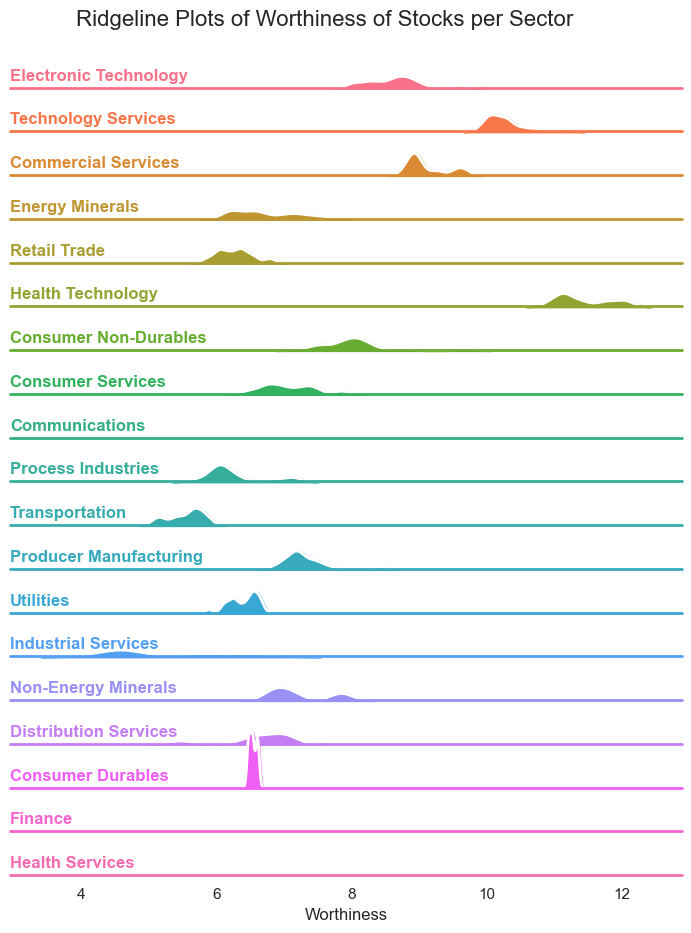

In [43]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(final_df, row="Sector", hue="Sector", aspect=15, height=.5)
g.map(sns.kdeplot, "Worthiness", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=2)
g.map(sns.kdeplot, "Worthiness", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Worthiness")
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
sns.set_style("whitegrid")
g.fig.suptitle("Ridgeline Plots of Worthiness of Stocks per Sector",fontsize=16)
plt.savefig('Ridgeline_Worthiness.png')

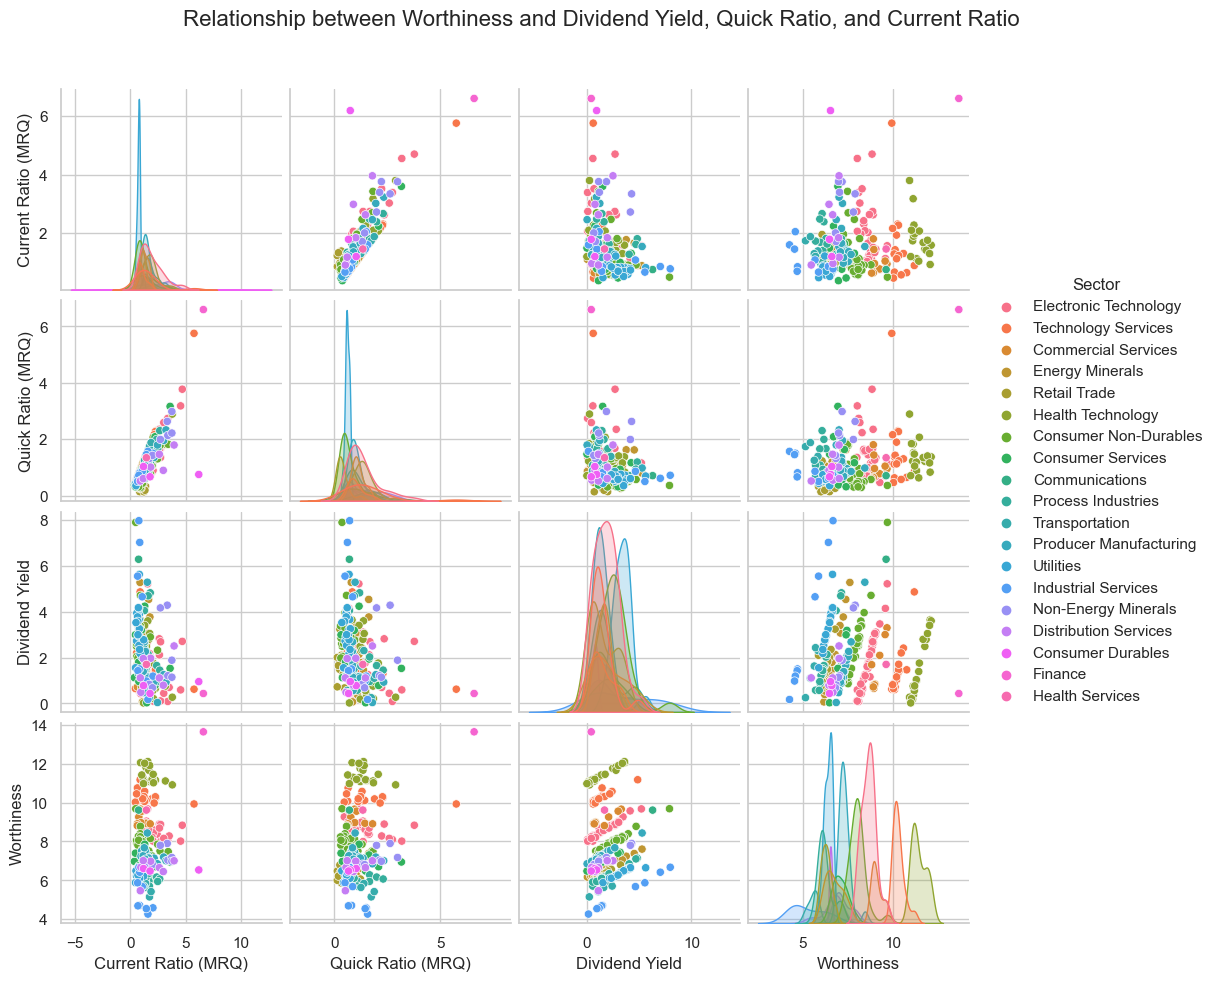

In [44]:
pairplot_df = final_df[['Current Ratio (MRQ)','Quick Ratio (MRQ)','Dividend Yield','Worthiness','Ticker','Sector']]
worthiness_comparison1 = sns.pairplot(data=pairplot_df,hue='Sector')
worthiness_comparison1.fig.suptitle("Relationship between Worthiness and Dividend Yield, Quick Ratio, and Current Ratio", fontsize=16)
plt.subplots_adjust(top=0.9)
sns.set_style("white")
plt.savefig('Relationship_CurrentRatio_Worthiness.png')

In [45]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
w = sns.FacetGrid(hexplot_df, hue="Sector", col="Sector",col_wrap=4)
w.map(hexbin, "Worthiness", "Basic EPS (FY)",extent=[4, 14, 0.15, 33])
w = w.set_titles("{col_name}")
w = w.set_axis_labels("Worthiness of Stock", "Earnings per Share")
w.fig.suptitle("Hexplot of Earnings per Share vs. Worthiness of Each Sector",fontsize=16)
plt.subplots_adjust(top=0.93)
plt.savefig('Hexplot_EPS_Worthiness.png')

NameError: name 'hexplot_df' is not defined

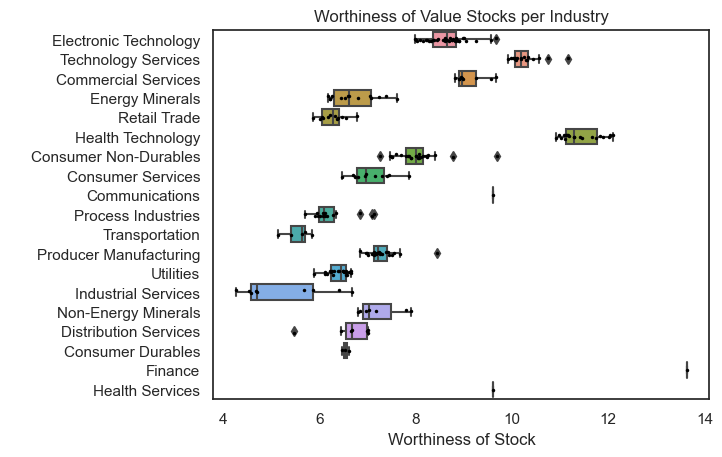

In [ ]:
sns.set_theme(style="white",palette='crest')
boxplot = sns.boxplot(data=final_df, y='Sector', x='Worthiness')
boxplot = sns.stripplot(data=final_df, y='Sector', x='Worthiness', color="black", size=2.5)
boxplot.set(title="Worthiness of Value Stocks per Industry", xlabel="Worthiness of Stock", ylabel=" ")
plt.savefig('BoxPlot_Worthiness.png')

In [ ]:
df_sorted_worthiness = final_df.sort_values(by='Worthiness', ascending=False).reset_index().drop(['index'],axis=1)
df_sorted_worthiness

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),...,Basic EPS (FY),Quick Ratio (MRQ),Current Ratio (MRQ),Dividends Paid (FY),Dividends Paid (FY),Risk,Industry Stability,Industry Safety Score,P/E Ratio (Reciprocal),Worthiness
0,TW,Tradeweb Markets Inc.,Finance,74.38,0.284141,4.400365,84.085793,0.453012,0.430223,58.631067,...,1.1262,6.597918,6.597918,-6.457000e+07,-6.457000e+07,1.397632,2.207449,16.039117,0.040707,13.634724
1,PFE,"Pfizer, Inc.",Health Technology,43.55,0.397076,1.190738,57.665338,0.035192,3.605052,8.432505,...,3.9539,1.374058,1.588730,-8.729000e+09,-8.729000e+09,0.414549,3.061069,13.339417,0.066798,12.105800
2,ABBV,AbbVie Inc.,Health Technology,145.65,0.819558,2.066497,69.493033,0.042240,3.645726,19.495942,...,6.4791,0.831255,0.928222,-9.261000e+09,-9.261000e+09,0.742634,3.061069,13.339417,0.055300,12.048936
3,GILD,"Gilead Sciences, Inc.",Health Technology,83.35,0.573020,1.266210,75.884115,0.079419,3.407319,31.663137,...,4.9562,1.160031,1.300393,-3.605000e+09,-3.605000e+09,0.499517,3.061069,13.339417,0.028107,12.017879
4,MDT,Medtronic plc.,Health Technology,82.58,0.671338,1.340985,62.879505,0.082795,3.051586,25.670677,...,3.7537,1.406360,1.755824,-3.383000e+09,-3.383000e+09,0.544478,3.061069,13.339417,0.029152,11.902481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WM,"Waste Management, Inc.",Industrial Services,153.10,0.532444,1.236074,26.886398,0.283943,1.502286,28.350362,...,4.3197,0.809859,0.851330,-9.700000e+08,-9.700000e+08,0.584101,2.614244,5.711876,0.069684,4.711186
234,RSG,"Republic Services, Inc.",Industrial Services,124.12,0.437307,0.882878,29.119965,0.416190,1.426039,27.035582,...,4.0475,0.663221,0.695177,-5.526000e+08,-5.526000e+08,0.538141,2.614244,5.711876,0.048752,4.691224
235,HAL,Halliburton Company,Industrial Services,40.34,0.276037,1.739711,16.401439,0.411202,1.189886,23.435512,...,1.7389,1.502152,2.049018,-4.350000e+08,-4.350000e+08,0.709538,2.614244,5.711876,0.055005,4.587975
236,J,Jacobs Solutions Inc.,Industrial Services,121.00,0.235736,1.174455,20.770324,0.442729,0.975207,24.484345,...,5.0056,1.452544,1.452544,-1.159480e+08,-1.159480e+08,0.573912,2.614244,5.711876,0.040780,4.546429


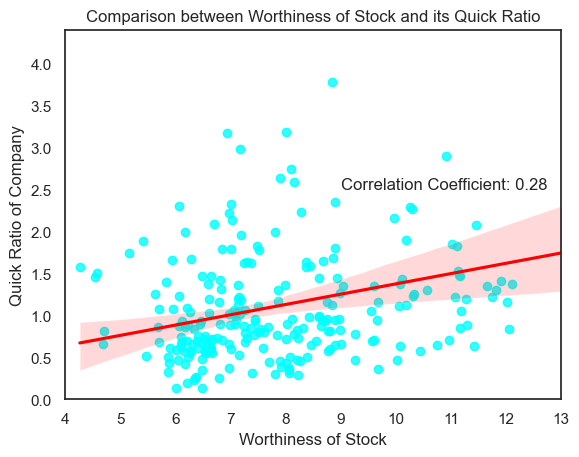

In [ ]:
# Confirmation graph for Quick Ratio
corr, p = stats.pearsonr(final_df["Worthiness"], final_df["Quick Ratio (MRQ)"])
sns.regplot(x="Worthiness", y="Quick Ratio (MRQ)", data=final_df, line_kws={"color":"red"},color="cyan")
plt.title("Comparison between Worthiness of Stock and its Quick Ratio")
plt.text(9, 2.5, f"Correlation Coefficient: {corr:.2f}")
plt.axis(xmin=4, xmax=13, ymin=0, ymax=4.4)
plt.xlabel("Worthiness of Stock")
plt.ylabel("Quick Ratio of Company")
plt.savefig('Correlation_QuickRatio_Worthiness.png')

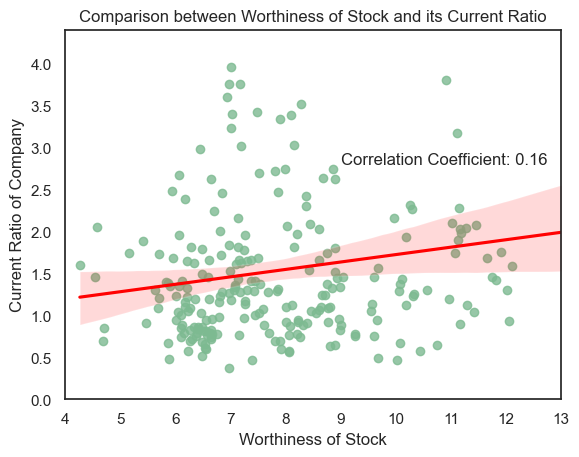

In [ ]:
# Confirmation graph for Current Ratio
corr, p = stats.pearsonr(final_df["Worthiness"], final_df["Current Ratio (MRQ)"])
sns.regplot(x="Worthiness", y="Current Ratio (MRQ)", data=final_df, line_kws={"color":"red"})
plt.title("Comparison between Worthiness of Stock and its Current Ratio")
plt.text(9, 2.8, f"Correlation Coefficient: {corr:.2f}")
plt.axis(xmin=4, xmax=13, ymin=0, ymax=4.4)
plt.xlabel("Worthiness of Stock")
plt.ylabel("Current Ratio of Company")
plt.savefig('Correlation_CurrentRatio_Worthiness.png')

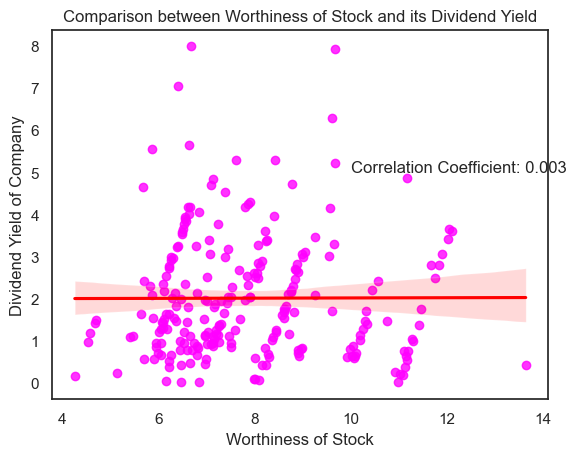

In [ ]:
# Confirmation graph for Dividend Yield
corr, p = stats.pearsonr(final_df["Worthiness"], final_df["Dividend Yield"])
sns.regplot(x="Worthiness", y="Dividend Yield", data=final_df, line_kws={"color":"red"},color="magenta")
plt.title("Comparison between Worthiness of Stock and its Dividend Yield")
plt.text(10, 5, f"Correlation Coefficient: {corr:.3f}")
plt.xlabel("Worthiness of Stock")
plt.ylabel("Dividend Yield of Company")
plt.savefig('Correlation_DividendYield_Worthiness.png')